## Data Assimilation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Question 2a


In [146]:
def process(alpha,q,T):
    x= np.zeros(T+1)
    x[0]= np.random.normal(0,1)
    esp=np.random.normal(0,q,T+1)
    for i in range(1,T+1):
        x[i]=alpha*x[i-1]+ esp[i]
    return x

In [147]:
x = process(0.8,0.4,30)

In [179]:
def h(T1,T2,T):
    h_i = np.zeros(T+1)
    h_i[:T1+1] =1
    h_i[T1+1:T2+1]= 0.1
    h_i[T2+1: T]= 1
    return h_i

In [180]:
H=h(10,20,30)

In [181]:
def data(x,r,T1,T2,T):
    #x1=process(alpha,q,T)
    h1=h(T1,T2,T)
    y = np.zeros(T+1)
    eps=np.random.normal(0,r,T+1)
    for i in range(T+1):
        y[i]=h1[i]*x[i] + eps[i]
    return y

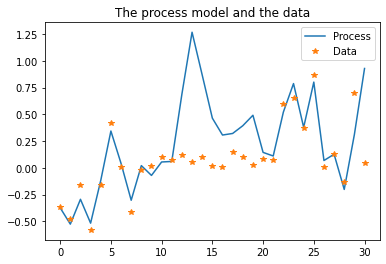

In [182]:
x = process(0.8,0.4,30) #q**q
data_y = data(x,0.1,10,20,30) #r**r

plt.plot(x, label= "Process")
plt.plot(data_y,'*', label = "Data")
plt.title("The process model and the data")
plt.legend()
plt.show()


# Question 2b



In [183]:
def kalman_filter(q,r,alpha,H,y):
    mu_f = np.zeros(T+1)
    sigma_f = np.zeros(T+1)
    mu_for = np.zeros(T+1)
    sigma_for = np.zeros(T+1)
    mu_f[0] = 0
    sigma_f[0] = 1
    for i in range(1, T+1):
        M_t = alpha
        mu_for[i] = M_t * mu_f[i-1]
        sigma_for[i] = q**2 + M_t*(sigma_f[i-1] * M_t)
        K = sigma_for[i]*H[i]*((H[i]*sigma_for[i]*H[i] + r**2)**(-1))
        mu_f[i] = mu_for[i]+ K*(y[i] - H[i]*mu_for[i])
        sigma_f[i] = (1- K*H[i])*sigma_for[i]
    return mu_f,mu_for, sigma_f, sigma_for
        

In [184]:
q = 0.4   #q*q
r = 0.1   #r*r
alpha = 0.8
T = 30
k_mf, k_mfo, k_sf, k_sfo=kalman_filter(q,r,alpha,H,data_y)
k_mf=k_mf[1:]
k_mfo=k_mfo[1:]
k_sf = k_sf[1:]
k_sfo = k_sfo[1:]

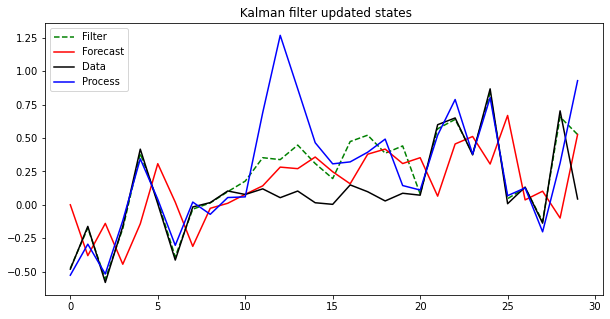

In [189]:
plt.figure(figsize=(10,5))
plt.plot(k_mf, 'g--', label='Filter')   
plt.plot(k_mfo, 'red', label='Forecast')
plt.plot(data_y[1:], "black" , label='Data')
plt.plot(x[1:], "blue", label='Process')
plt.title(" Kalman updated states")
plt.legend()
plt.show()

# Question 2c


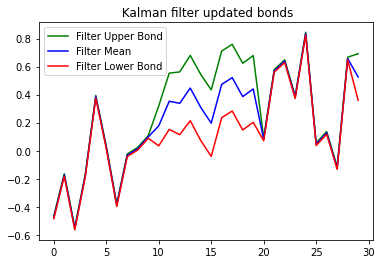

In [192]:
plt.plot((k_mf + k_sf),'green', label='Filter Upper Bond')  #???
plt.plot(k_mf,'blue', label='Filter Mean ')
plt.plot((k_mf-k_sf),'red', label='Filter Lower Bond')
plt.title(" Kalman ﬁlter updated bonds")
plt.legend()
plt.show()

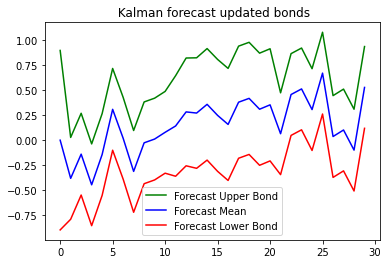

In [193]:
plt.plot((k_mfo + np.sqrt(k_sfo)),'green', label='Forecast Upper Bond') 
plt.plot(k_mfo,'blue', label='Forecast Mean ')
plt.plot((k_mfo-np.sqrt(k_sfo)),'red', label='Forecast Lower Bond')
plt.title(" Kalman forecast updated bonds")
plt.legend()
plt.show()

# Question 3a

In [57]:
def process1(alpha,q,T):
    x= np.zeros(T+1)
    x[0]= np.random.normal(0.1,0.01)
    esp=np.random.normal(0,q,T+1)
    for t in range(1,T+1):
        x[t]=alpha*x[t-1]*(1-x[t-1])+ esp[t]
    return x

In [58]:
def data1(x,r,T):
    y = np.zeros(T+1)
    eps=np.random.normal(0,r,T+1)
    for t in range(T):
        y[t]=x[t] + eps[t]
    return y[1:]

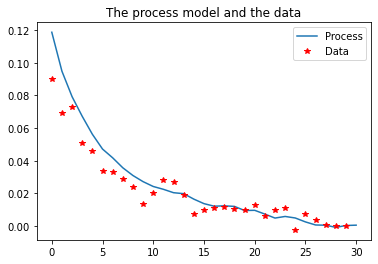

In [197]:
x1 = process1(0.9,0.001,30)
data_y1 = data1(x1,0.005,30)

plt.plot(x1,label = "Process")
plt.plot(data_y1,'*', color = 'red',label = "Data")
plt.title("The process model and the data")
plt.legend()
plt.show()


# Question 3b

In [116]:
def MT(alp, x1):
    m_t = np.zeros(T)
    for i in range(T):
        m_t[i] = alp-2*alp*x1[i-1]
    return m_t

alp = 0.9
MTT =MT(alp, x1)

In [117]:
def kalman_filter2(q1,r1,alp,MT,data_y1):
    mu_f = np.zeros(T+1)
    sigma_f = np.zeros(T+1)
    mu_for = np.zeros(T+1)
    sigma_for = np.zeros(T+1)
    mu_f[0] = 0.1
    sigma_f[0] = 0.01
    H = 1
    for i in range(1, T):
        mu_for[i] = alp * (mu_f[i-1] * (1- mu_f[i-1]))
        sigma_for[i] = q1**2 + MT[i]*(sigma_f[i-1] * MT[i])
        K = sigma_for[i]*H*((H*sigma_for[i]*H + r1**2)**(-1))
        mu_f[i] = mu_for[i]+ K*(data_y1[i] - H*mu_for[i])
        sigma_f[i] = (1- K*H)*sigma_for[i]
    return mu_f,mu_for, sigma_f, sigma_for

In [118]:
q1 = 0.001 
r1 = 0.005
alp = 0.9
T = 30
k_mf1, k_mfo1, k_sf1, k_sfo1=kalman_filter2(q1,r1,alp,MTT,data_y1)

k_mf1=k_mf1[1:]
k_mfo1=k_mfo1[1:]
k_sf1 = k_sf1[1:]
k_sfo1 = k_sfo1[1:]

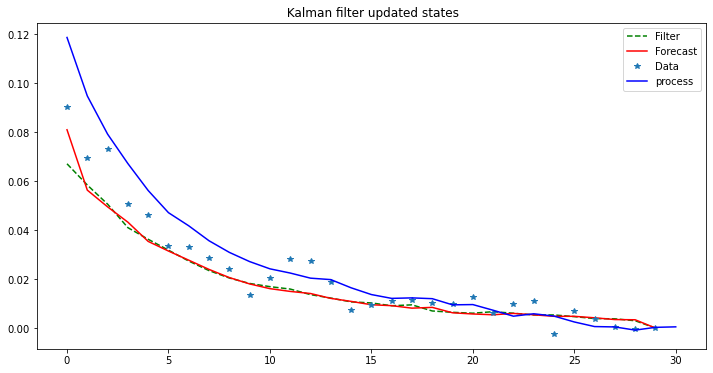

In [198]:
plt.figure(figsize=(12,6))
plt.plot(k_mf1, 'g--', label='Filter')
plt.plot(k_mfo1, 'red', label='Forecast')
plt.plot(data_y1, '*', label='Data')
plt.plot(x1, "blue", label='process')
plt.title(" Kalman ﬁlter updated states")
plt.legend()
plt.show()

# Question 3c

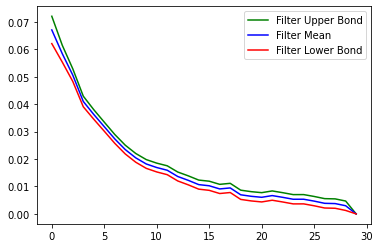

In [199]:
plt.plot((k_mf1 + np.sqrt(k_sf1)),'green', label='Filter Upper Bond')
plt.plot(k_mf1,'blue', label='Filter Mean ')
plt.plot((k_mf1-np.sqrt(k_sf1)),'red', label='Filter Lower Bond')
plt.legend()
plt.show()

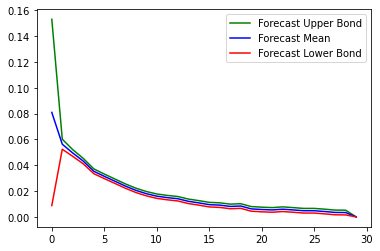

In [122]:
plt.plot((k_mfo1 + np.sqrt(k_sfo1)),'green', label='Forecast Upper Bond')
plt.plot(k_mfo1,'blue', label='Forecast Mean ')
plt.plot((k_mfo1-np.sqrt(k_sfo1)),'red', label='Forecast Lower Bond')
plt.legend()
plt.show()